In [1]:
%matplotlib inline
import osmnx as ox
import geopandas as gpd
import networkx as nx
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
ox.config(log_file=True, log_console=True, use_cache=True)

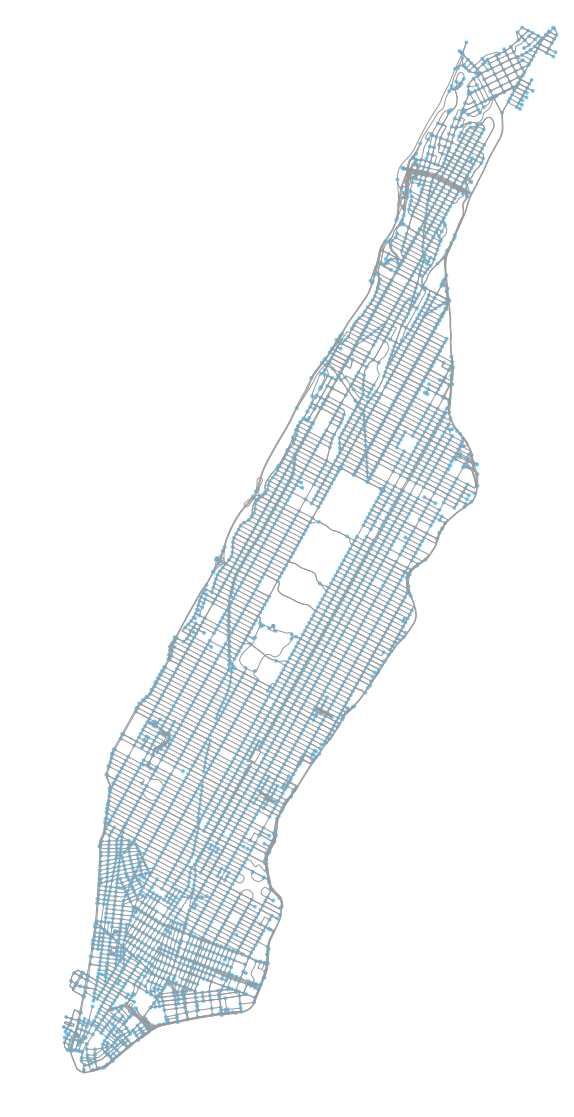

In [2]:
G0 = ox.graph_from_place('Manhattan Island, New York City, New York, USA', network_type='drive')
G0_projected = ox.project_graph(G0)
fig, ax = ox.plot_graph(G0_projected, fig_height = 20)

In [3]:
import csv
 
#PART ONE  
latlngpick = []
latlngdrop = []
for line in open('trial_loc1.csv'): 
    clean_line = line.strip()
    data_points = clean_line.split(',')
    p,q,r,s = float(data_points[0]), float(data_points[1]),float(data_points[2]),float(data_points[3])
    pq = [p,q]
    rs = [r,s]
    latlngpick.append(pq)
    latlngdrop.append(rs)
    

In [4]:
nearestnodespick = [] 
for i in latlngpick:
    nearestnodespick.append(ox.get_nearest_node(G0, i))    

In [5]:
nearestnodesdrop = [] 
for i in latlngdrop:
    nearestnodesdrop.append(ox.get_nearest_node(G0, i))

In [6]:
ec0 = ox.get_edge_colors_by_attr(G0, attr='length',num_bins=5,cmap = 'rainbow')

Normal Map


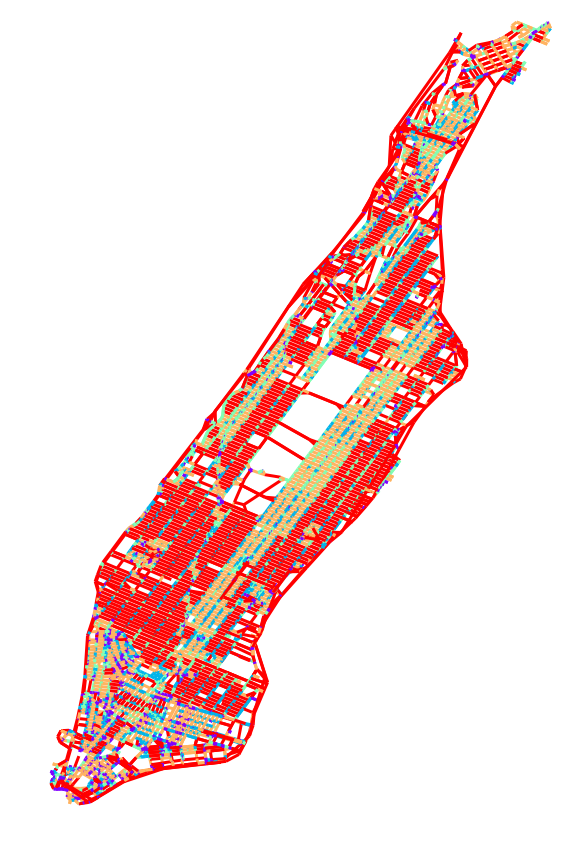

In [7]:
print("Normal Map")

fig, ax = ox.plot_graph(G0, node_color='w', node_edgecolor='k', node_size=0, node_zorder=3, 
                           edge_color=ec0, edge_linewidth=3, edge_alpha=1, use_geom=False,fig_height = 15)


In [8]:
length = []
for u,v,d in G0.edges(data=True):    
        length.append(d['length'])
        

In [9]:
p20 = np.percentile(length,20)
p40 = np.percentile(length,40)
p60 = np.percentile(length,60)
p80 = np.percentile(length,80)

In [10]:
colorlist = []
for i in length:
    if(i >= p80):
        colorlist.append('r')
    elif(i >= p60):
        colorlist.append('orange')
    elif(i >= p40):
        colorlist.append('y')
    elif(i >= p20):
        colorlist.append('g')
    else:
        colorlist.append('b')
    

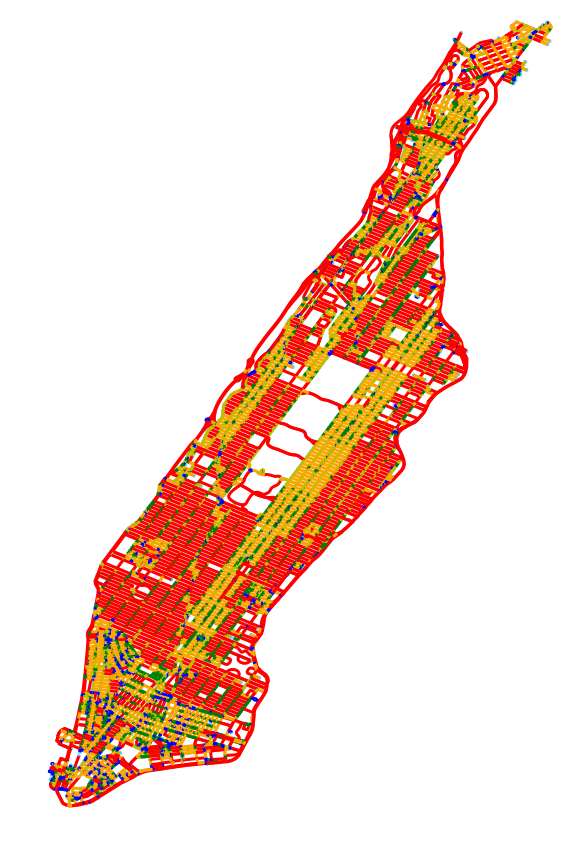

In [11]:
fig, ax = ox.plot_graph(G0, edge_color=colorlist, edge_linewidth=3,fig_height = 15)

In [12]:
import csv
 
#PART ONE  
latlng = []
for line in open('NYCLL1.csv'): 
    clean_line = line.strip()
    data_points = clean_line.split(',')
    p,q = float(data_points[0]), float(data_points[1])
    pq = [p,q]
    latlng.append(pq) 

#PART TWO   
nearestnodes = [] 
for i in latlng:
    nearestnodes.append(ox.get_nearest_node(G0, i))

#PART THREE    
node_collisioncount = []
unique_nodes = set(nearestnodes)
for i in unique_nodes:
    k = nearestnodes.count(i)
    p = [i,k]
    node_collisioncount.append(p)

In [13]:
node_number = []
node_colcount = []
for i in node_collisioncount:
    node_number.append(i[0])
    node_colcount.append(i[1])
    
print("Sample of node_collisioncount :",node_collisioncount[0:4])
print("Sample of node_number         :",node_number[0:4])
print("Sample of node_colcount       :",node_colcount[0:4])

Sample of node_collisioncount : [[1773060097, 1], [42459137, 1], [1773060099, 3], [373268484, 1]]
Sample of node_number         : [1773060097, 42459137, 1773060099, 373268484]
Sample of node_colcount       : [1, 1, 3, 1]


In [14]:
def additive_penalty_map(node_number,node_colcount,factor,G):   
    G1 = G.copy()    
    penalty = []
    for i in node_colcount:
        penalty.append(i*20*factor)
                
    counter = 0
    for j in node_number:
        for u,v,d in G1.edges(data=True):
            if (u==j):
                d['length'] = d['length'] + penalty[counter]
        counter +=1
    return G1        

In [15]:
G1 = additive_penalty_map(node_number,node_colcount,5,G0)

In [36]:
length0 = []
for u,v,d in G0.edges(data=True):    
        length0.append(d['length'])
length1 = []
for u,v,d in G1.edges(data=True):    
        length1.append(d['length'])
        

In [37]:
p20 = np.percentile(length1,20)
p40 = np.percentile(length1,40)
p60 = np.percentile(length1,60)
p80 = np.percentile(length1,80)
    

In [41]:
colorlist0 = []
for i in length0:
    if(i >= p80):
        colorlist0.append('orangered')
    elif(i >= p60):
        colorlist0.append('orange')
    elif(i >= p40):
        colorlist0.append('gold')
    elif(i >= p20):
        colorlist0.append('lime')
    else:
        colorlist0.append('dodgerblue')
    
colorlist1 = []
for i in length1:
    if(i >= p80):
        colorlist1.append('orangered')
    elif(i >= p60):
        colorlist1.append('orange')
    elif(i >= p40):
        colorlist1.append('gold')
    elif(i >= p20):
        colorlist1.append('lime')
    else:
        colorlist1.append('dodgerblue')

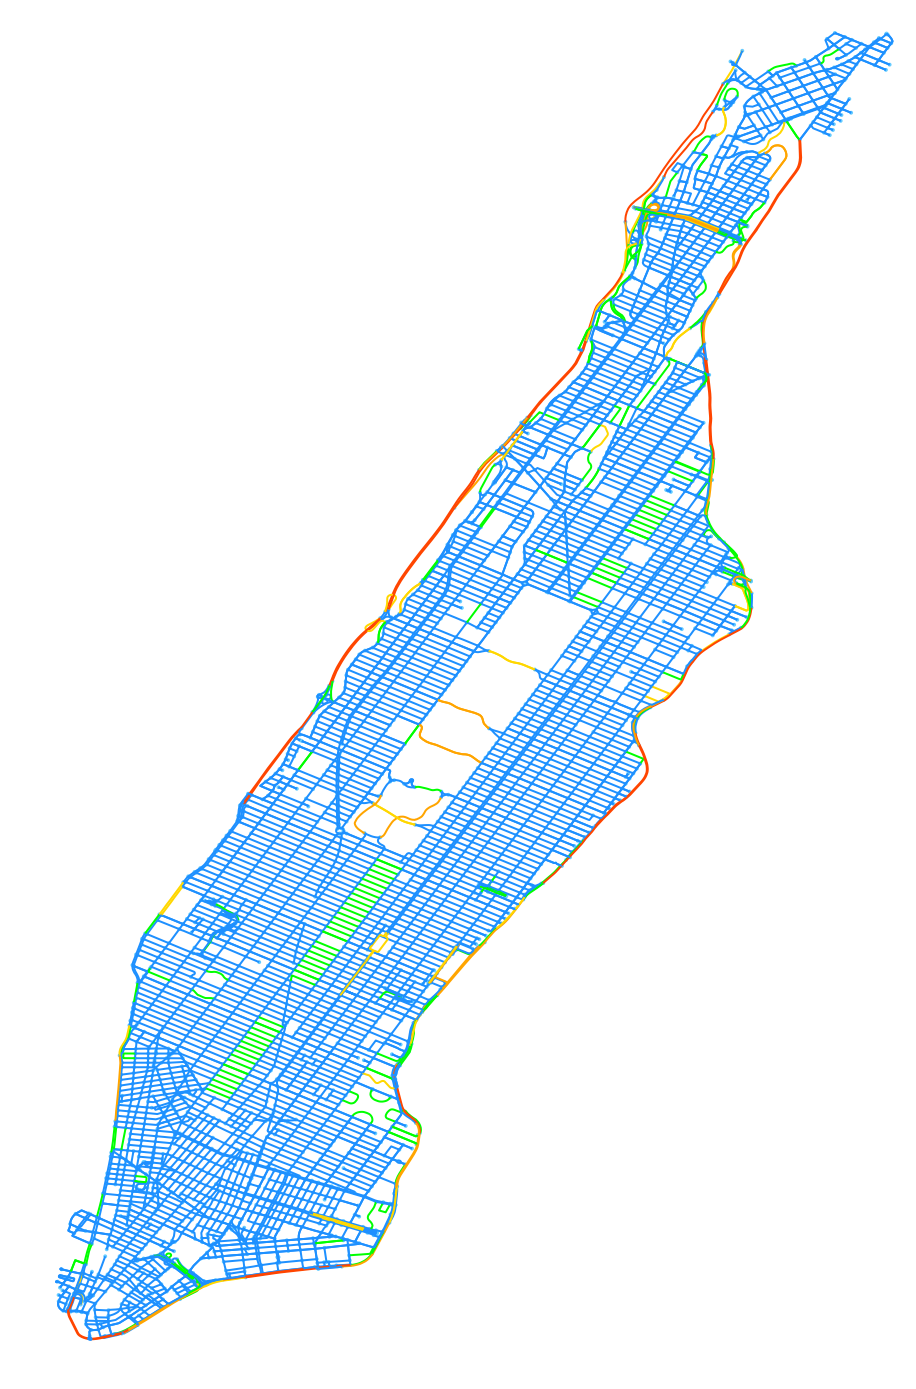

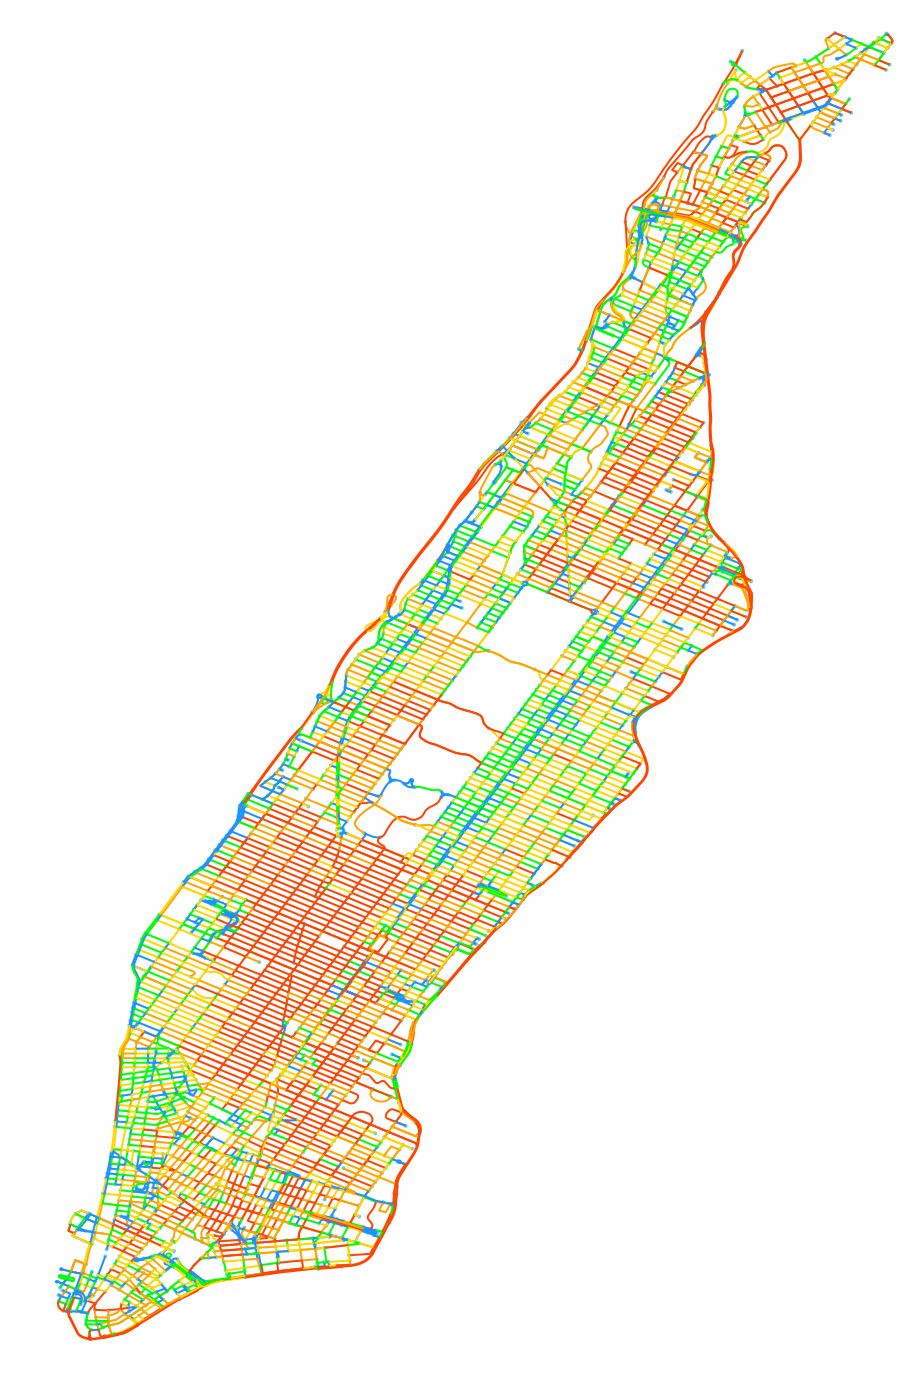

In [42]:
fig, ax = ox.plot_graph(G0, edge_color=colorlist0, edge_linewidth=2,fig_height = 25)
fig, ax = ox.plot_graph(G1, edge_color=colorlist1, edge_linewidth=2,fig_height = 25)